### K-MEANS & HIERARCHICAL CLUSTERING




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import (KMeans , AgglomerativeClustering)
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
gene_expression= '/content/drive/MyDrive/Ch12Ex13.csv'
data = pd.read_csv(gene_expression, header=None)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.T)

In [ ]:
# PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

Silhouette Score: 0.64


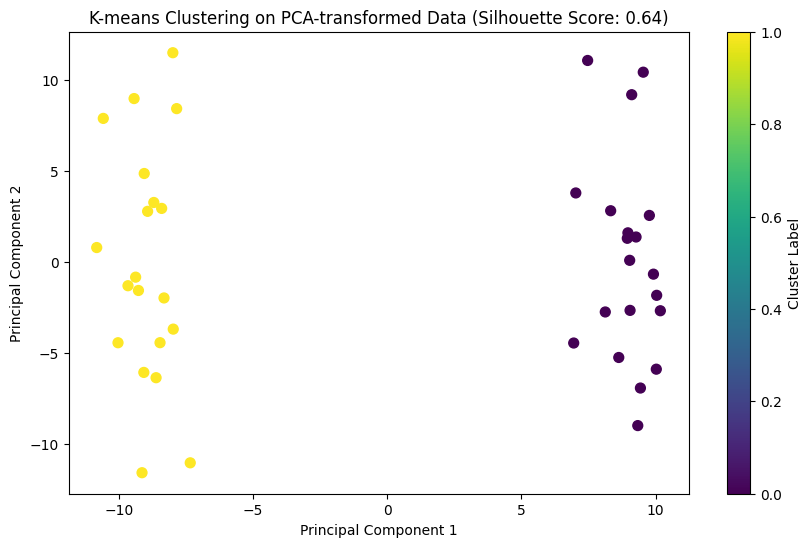

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(data_pca[:, :2])


silhouette_avg = silhouette_score(data_pca[:, :2], kmeans_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')


plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title(f'K-means Clustering on PCA-transformed Data (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

From the results we've obtained, The clustering indicates that there are two dominant groups in the data, and PCA has successfully projected the data into a space where these groups are distinguishable. The silhouette score of 0.64 reinforces that the clustering is meaningful, though it may not capture every nuance in the dataset.

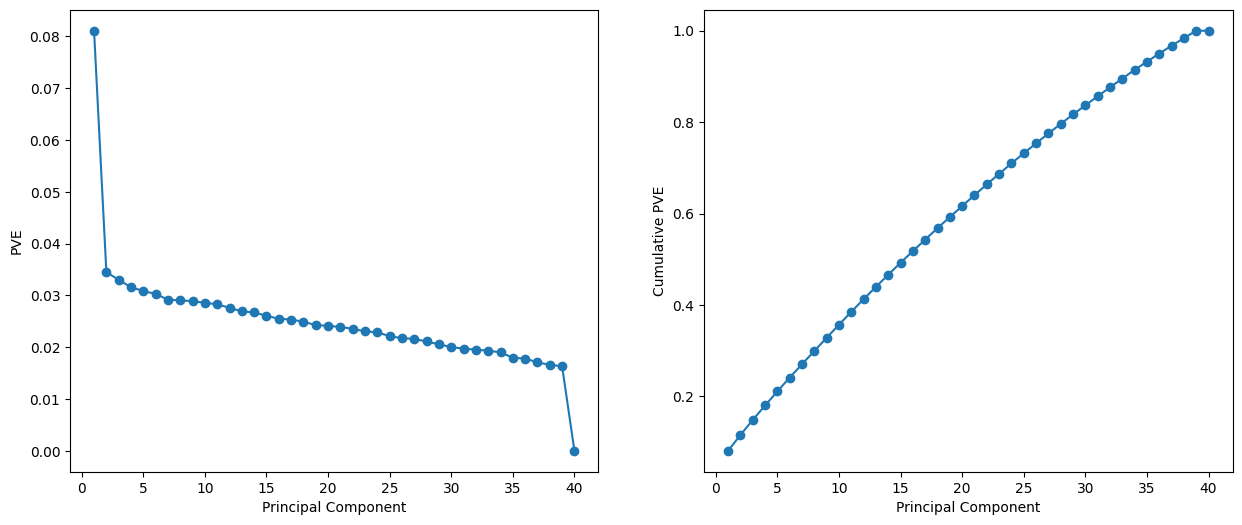

In [ ]:
# PVE by principal components
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pca.n_components_) + 1
axes[0].plot(ticks, pca.explained_variance_ratio_, marker='o')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('PVE')
axes[1].plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o')
axes[1].set_xlabel('Principal Component')
axes[1].set_ylabel('Cumulative PVE')
plt.show()


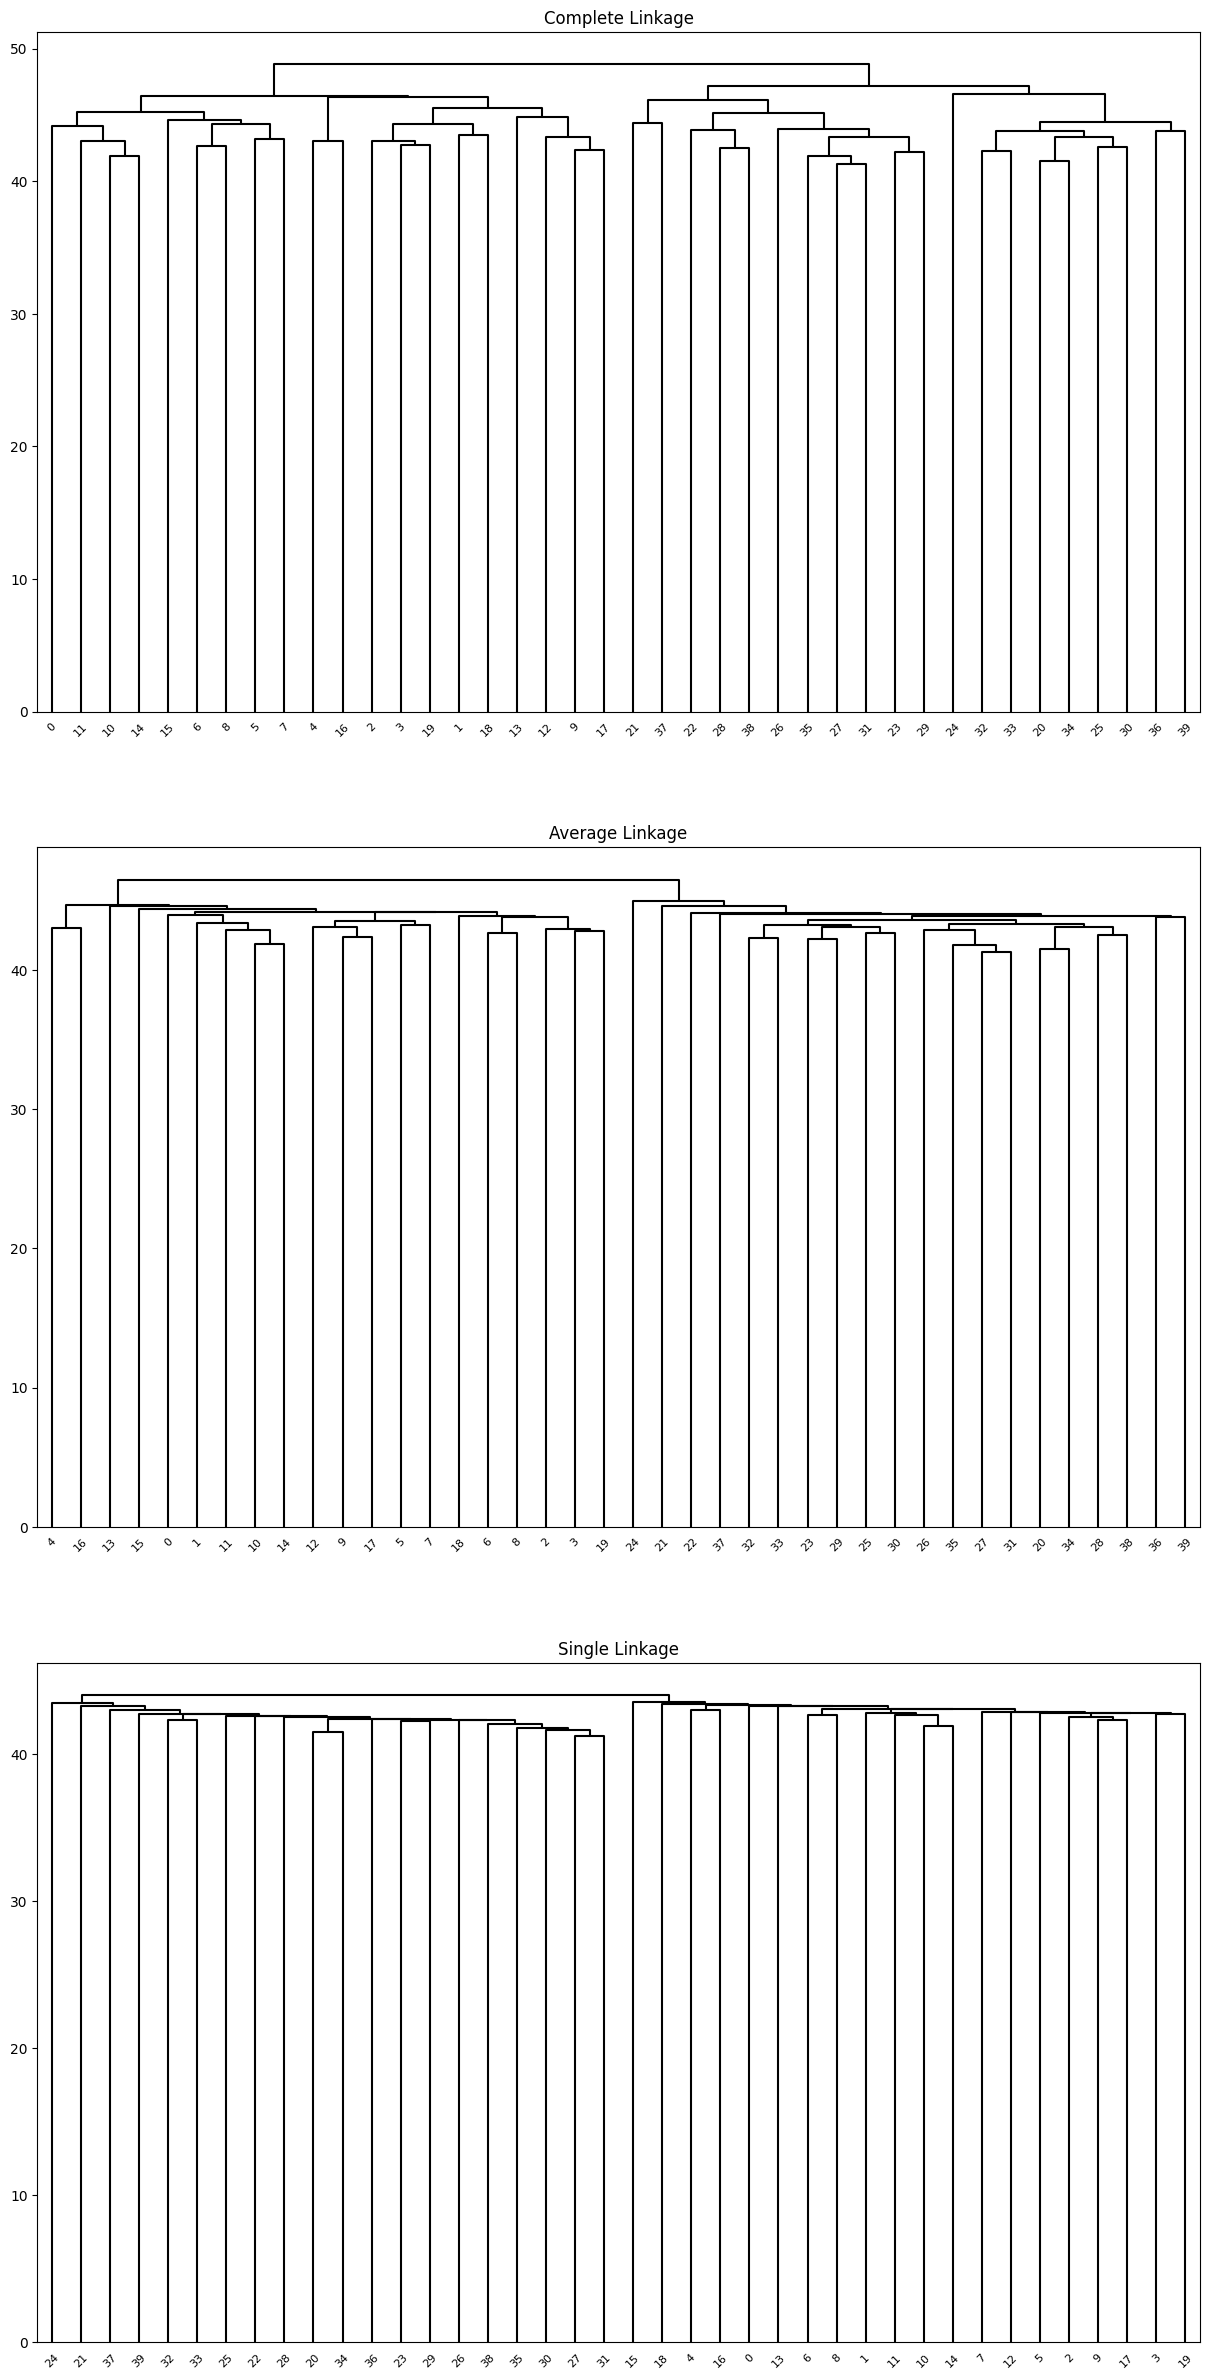

In [ ]:
# Hierarchical clustering
def plot_nci(linkage_method, ax):
    Z = linkage(data_scaled, method=linkage_method.lower(), metric='euclidean')
    dendrogram(Z, ax=ax, color_threshold=-np.inf, above_threshold_color='black')
    ax.set_title(f'{linkage_method.capitalize()} Linkage')

fig, axes = plt.subplots(3, 1, figsize=(15, 30))
plot_nci('complete', axes[0])
plot_nci('average', axes[1])
plot_nci('single', axes[2])
plt.show()

For this dataset, complete linkage appears to offer the best separation into two clusters, followed closely by average linkage. Single linkage is less effective due to its chaining effect, which can blur the boundaries between the two groups. Thus, complete linkage would likely be the preferred method for identifying the two clusters in this context.